data scienc end of year part 4

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [2]:
# importing the data sets for alone


df_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv')
df_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv')
df_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_alone_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv')
df_alone_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv')
df_alone_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')
df_alone_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv')
df_alone_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv')
df_alone_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv')
df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [116]:
columns_right=('Time_r','Frame ID_r','Hand Type_r','Position X_r','Position Y_r','Position Z_r','Velocity X_r','Velocity y_r',
               'Velocity Z_r','Pitch_r','Roll_r','Yaw_r','Wrist Pos X_r','Wrist Pos X_r','Wrist Pos Y_r','Wrist Pos Z_r',
               'Elbow pos X_r','Elbow pos Y_r','Elbow pos Z_r','Grab Strenth_r','Grab Angle_r','Pinch Strength_r')

In [117]:
# changing the nmes for the columns in the right hand data frame
df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 
df_hand_right.head(1)

,Time_r,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,128.2883,15478,right,1,15.67167,226.2064,20.2647,34.26665,-195.2147,-35.04302,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [118]:
# deleting rows with null values

df_alone_person1=df_alone_person1.dropna('index','any')
df_alone_person2=df_alone_person2.dropna('index','any')
df_alone_person3=df_alone_person3.dropna('index','any')
df_alone_person4=df_alone_person4.dropna('index','any')
df_alone_person5=df_alone_person5.dropna('index','any')
df_alone_person6=df_alone_person6.dropna('index','any')
df_alone_person7=df_alone_person7.dropna('index','any')
df_alone_person8=df_alone_person8.dropna('index','any')
df_alone_person9=df_alone_person9.dropna('index','any')
df_hand_right=df_hand_right.dropna('index','any')
df_hand_right.head(1)

,Time_r,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,128.2883,15478,right,1,15.67167,226.2064,20.2647,34.26665,-195.2147,-35.04302,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [119]:
df_alone_person1.head(1)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,518.8087,149620,left,1,-97.6016,164.1213,42.81255,104.2589,-491.673,-55.42755,...,1.661706,-166.7207,164.832,27.58547,-378.1662,65.8933,-69.90282,0.0,0.741855,0.0


In [120]:
# adding the right hand to the left
df_alone_person1_combo=pd.concat([df_alone_person1,df_hand_right],axis=1,)
df_alone_person2_combo=pd.concat([df_alone_person2,df_hand_right],axis=1,)
df_alone_person3_combo=pd.concat([df_alone_person3,df_hand_right],axis=1,)
df_alone_person4_combo=pd.concat([df_alone_person4,df_hand_right],axis=1,)
df_alone_person5_combo=pd.concat([df_alone_person5,df_hand_right],axis=1,)
df_alone_person6_combo=pd.concat([df_alone_person6,df_hand_right],axis=1,)
df_alone_person7_combo=pd.concat([df_alone_person7,df_hand_right],axis=1,)
df_alone_person8_combo=pd.concat([df_alone_person8,df_hand_right],axis=1,)
df_alone_person9_combo=pd.concat([df_alone_person9,df_hand_right],axis=1,)

In [121]:
df_alone_person1_combo.head(1)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,518.8087,149620,left,1,-97.6016,164.1213,42.81255,104.2589,-491.673,-55.42755,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [122]:
df_alone_person1_combo=df_alone_person1_combo.loc[df_alone_person1_combo[' # hands']==1]
df_alone_person2_combo=df_alone_person2_combo.loc[df_alone_person2_combo[' # hands']==1]
df_alone_person3_combo=df_alone_person3_combo.loc[df_alone_person3_combo[' # hands']==1]
df_alone_person4_combo=df_alone_person4_combo.loc[df_alone_person4_combo[' # hands']==1]
df_alone_person5_combo=df_alone_person5_combo.loc[df_alone_person5_combo[' # hands']==1]
df_alone_person6_combo=df_alone_person6_combo.loc[df_alone_person6_combo[' # hands']==1]
df_alone_person7_combo=df_alone_person7_combo.loc[df_alone_person7_combo[' # hands']==1]
df_alone_person8_combo=df_alone_person8_combo.loc[df_alone_person8_combo[' # hands']==1]
df_alone_person9_combo=df_alone_person9_combo.loc[df_alone_person9_combo[' # hands']==1]

In [123]:
# adding a laybel

df_alone_person1_combo["type"]=0
df_alone_person2_combo["type"]=0
df_alone_person3_combo["type"]=0
df_alone_person4_combo["type"]=0
df_alone_person5_combo["type"]=0
df_alone_person6_combo["type"]=0
df_alone_person7_combo["type"]=0
df_alone_person8_combo["type"]=0
df_alone_person9_combo["type"]=0

In [124]:
df_alone_person1

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,518.8087,149620,left,1,-97.60160,164.1213,42.812550,104.2589,-491.6730,-55.42755,...,1.661706,-166.7207,164.8320,27.585470,-378.1662,65.89330,-69.90282,0.0,0.741855,0.0
1,518.8252,149622,left,1,-95.78062,157.6353,42.180840,148.9683,-351.7386,-36.32422,...,1.623222,-165.4907,155.6419,29.710370,-380.3233,52.92441,-55.71872,0.0,0.827916,0.0
2,518.8418,149623,left,1,-94.39360,154.6338,41.931710,161.6958,-349.9117,-29.04277,...,1.602898,-164.3658,151.5701,31.050590,-381.7444,48.55032,-47.27909,0.0,0.920401,0.0
3,518.8587,149625,left,1,-92.02553,150.6723,42.101190,117.3475,-187.1781,24.42598,...,1.567605,-162.2663,144.6214,33.945770,-383.4688,40.27151,-30.72728,0.0,1.034603,0.0
4,518.8749,149627,left,1,-89.31953,148.1826,42.670650,155.3344,-135.6337,35.87055,...,1.535920,-159.4586,138.6087,36.681950,-381.0906,29.07133,-17.01065,0.0,1.166705,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,593.7177,158254,left,1,-44.79453,123.7657,-6.241947,274.4463,106.7892,125.05260,...,1.476095,-114.5244,107.5486,-6.354107,-354.6525,41.16571,45.73993,0.0,0.401728,0.0
4522,593.7343,158256,left,1,-40.77390,126.7342,-3.452266,223.5294,209.7239,160.24900,...,1.484591,-110.5008,110.7256,-3.791958,-351.3217,53.68426,55.64309,0.0,0.190267,0.0
4523,593.7509,158257,left,1,-38.56184,127.6858,-2.086977,254.9331,109.6613,157.34590,...,1.489703,-108.3443,111.9989,-2.676469,-349.8930,59.75835,58.19042,0.0,0.042665,0.0
4524,593.7681,158259,left,1,-35.88303,132.9386,0.526575,185.8687,204.9822,154.04880,...,1.489702,-105.4344,116.3043,0.041351,-346.9033,66.47016,63.19174,0.0,0.000000,0.0


In [125]:
df_alone_person1_combo=df_alone_person1_combo.set_index('Time')
df_alone_person2_combo=df_alone_person2_combo.set_index('Time')
df_alone_person3_combo=df_alone_person3_combo.set_index('Time')
df_alone_person4_combo=df_alone_person4_combo.set_index('Time')
df_alone_person5_combo=df_alone_person5_combo.set_index('Time')
df_alone_person6_combo=df_alone_person6_combo.set_index('Time')
df_alone_person7_combo=df_alone_person7_combo.set_index('Time')
df_alone_person8_combo=df_alone_person8_combo.set_index('Time')
df_alone_person9_combo=df_alone_person9_combo.set_index('Time')

In [126]:
df_alone_person1_combo=df_alone_person1_combo.dropna('index','any')
df_alone_person2_combo=df_alone_person2_combo.dropna('index','any')
df_alone_person3_combo=df_alone_person3_combo.dropna('index','any')
df_alone_person4_combo=df_alone_person4_combo.dropna('index','any')
df_alone_person5_combo=df_alone_person5_combo.dropna('index','any')
df_alone_person6_combo=df_alone_person6_combo.dropna('index','any')
df_alone_person7_combo=df_alone_person7_combo.dropna('index','any')
df_alone_person8_combo=df_alone_person8_combo.dropna('index','any')
df_alone_person9_combo=df_alone_person9_combo.dropna('index','any')

In [127]:
df_alone_person1_combo

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
Time,,,,,,,,,,,,,,,,,,,,,
518.8087,149620,left,1,-97.60160,164.1213,42.81255,104.25890,-491.67300,-55.427550,2.939312,...,46.888310,207.35480,86.23589,203.83370,49.33507,237.4553,0.0,0.206389,0.0,0
518.8252,149622,left,1,-95.78062,157.6353,42.18084,148.96830,-351.73860,-36.324220,2.294397,...,47.548610,205.65680,86.42250,203.95530,47.88272,238.4482,0.0,0.243050,0.0,0
518.8418,149623,left,1,-94.39360,154.6338,41.93171,161.69580,-349.91170,-29.042770,1.962658,...,48.150300,204.51820,86.35149,204.62310,45.35921,236.8544,0.0,0.281134,0.0,0
518.8587,149625,left,1,-92.02553,150.6723,42.10119,117.34750,-187.17810,24.425980,1.545560,...,48.641750,203.99890,86.16056,204.99390,44.18692,236.0927,0.0,0.277691,0.0,0
518.8749,149627,left,1,-89.31953,148.1826,42.67065,155.33440,-135.63370,35.870550,1.377898,...,48.931350,203.37770,85.59017,204.59520,42.68003,235.2896,0.0,0.283008,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592.0942,158066,left,1,-15.74251,202.1353,22.12874,-46.31099,124.06970,17.246830,1.567111,...,1.693034,105.98620,171.82360,-108.34840,-93.43824,319.8367,0.0,0.133462,0.0,0
592.1113,158068,left,1,-16.24674,203.0931,22.20971,-33.08001,60.73317,8.165891,1.567282,...,0.450534,104.88660,177.28050,-104.47600,-95.64841,327.4911,0.0,0.100465,0.0,0
592.1273,158070,left,1,-16.87157,204.7203,22.30869,-45.92556,119.77210,8.702595,1.569057,...,0.317466,103.76150,179.51640,-98.71099,-100.80110,328.2934,0.0,0.202968,0.0,0


In [128]:
# getting rid of the 7 first secounds

df_alone_person1_combo=df_alone_person1_combo.iloc[700:]
df_alone_person2_combo=df_alone_person2_combo.iloc[700:]
df_alone_person3_combo=df_alone_person3_combo.iloc[700:]
df_alone_person4_combo=df_alone_person4_combo.iloc[700:]
df_alone_person5_combo=df_alone_person5_combo.iloc[700:]
df_alone_person6_combo=df_alone_person6_combo.iloc[700:]
df_alone_person7_combo=df_alone_person7_combo.iloc[700:]
df_alone_person8_combo=df_alone_person8_combo.iloc[700:]
df_alone_person9_combo=df_alone_person9_combo.iloc[700:]

In [129]:
# importing the data sets for sync


df_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')
df_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv')
df_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_sync_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv')
df_sync_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv')
df_sync_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')
df_sync_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv')
df_sync_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv')
df_sync_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv')

In [130]:
#seperating the left hand from the right hand

df_sync_person1_r=df_sync_person1.loc[df_sync_person1[' Hand Type']=="right"]
df_sync_person1_l=df_sync_person1.loc[df_sync_person1[' Hand Type']=="left"]
df_sync_person2_r=df_sync_person2.loc[df_sync_person2[' Hand Type']=="right"]
df_sync_person2_l=df_sync_person2.loc[df_sync_person2[' Hand Type']=="left"]
df_sync_person3_r=df_sync_person3.loc[df_sync_person3[' Hand Type']=="right"]
df_sync_person3_l=df_sync_person3.loc[df_sync_person3[' Hand Type']=="left"]
df_sync_person4_r=df_sync_person4.loc[df_sync_person4[' Hand Type']=="right"]
df_sync_person4_l=df_sync_person4.loc[df_sync_person4[' Hand Type']=="left"]
df_sync_person5_r=df_sync_person5.loc[df_sync_person5[' Hand Type']=="right"]
df_sync_person5_l=df_sync_person5.loc[df_sync_person5[' Hand Type']=="left"]
df_sync_person6_r=df_sync_person6.loc[df_sync_person6[' Hand Type']=="right"]
df_sync_person6_l=df_sync_person6.loc[df_sync_person6[' Hand Type']=="left"]
df_sync_person7_r=df_sync_person7.loc[df_sync_person7[' Hand Type']=="right"]
df_sync_person7_l=df_sync_person7.loc[df_sync_person7[' Hand Type']=="left"]
df_sync_person8_r=df_sync_person8.loc[df_sync_person8[' Hand Type']=="right"]
df_sync_person8_l=df_sync_person8.loc[df_sync_person8[' Hand Type']=="left"]
df_sync_person9_r=df_sync_person9.loc[df_sync_person9[' Hand Type']=="right"]
df_sync_person9_l=df_sync_person9.loc[df_sync_person9[' Hand Type']=="left"]


In [131]:
# changing the names of the right hand columns
df_sync_person1_r=df_sync_person1_r.set_axis(columns_right, axis='columns')
df_sync_person2_r=df_sync_person2_r.set_axis(columns_right, axis='columns')
df_sync_person3_r=df_sync_person3_r.set_axis(columns_right, axis='columns')
df_sync_person4_r=df_sync_person4_r.set_axis(columns_right, axis='columns')
df_sync_person5_r=df_sync_person5_r.set_axis(columns_right, axis='columns')
df_sync_person6_r=df_sync_person6_r.set_axis(columns_right, axis='columns')
df_sync_person7_r=df_sync_person7_r.set_axis(columns_right, axis='columns')
df_sync_person8_r=df_sync_person8_r.set_axis(columns_right, axis='columns')
df_sync_person9_r=df_sync_person9_r.set_axis(columns_right, axis='columns')

In [132]:
# setting the index to the time stamp to the left and right data frames
df_sync_person1_r=df_sync_person1_r.set_index('Time_r')
df_sync_person1_l=df_sync_person1_l.set_index('Time')
df_sync_person2_r=df_sync_person2_r.set_index('Time_r')
df_sync_person2_l=df_sync_person2_l.set_index('Time')
df_sync_person3_r=df_sync_person3_r.set_index('Time_r')
df_sync_person3_l=df_sync_person3_l.set_index('Time')
df_sync_person4_r=df_sync_person4_r.set_index('Time_r')
df_sync_person4_l=df_sync_person4_l.set_index('Time')
df_sync_person5_r=df_sync_person5_r.set_index('Time_r')
df_sync_person5_l=df_sync_person5_l.set_index('Time')
df_sync_person6_r=df_sync_person6_r.set_index('Time_r')
df_sync_person6_l=df_sync_person6_l.set_index('Time')
df_sync_person7_r=df_sync_person7_r.set_index('Time_r')
df_sync_person7_l=df_sync_person7_l.set_index('Time')
df_sync_person8_r=df_sync_person8_r.set_index('Time_r')
df_sync_person8_l=df_sync_person8_l.set_index('Time')
df_sync_person9_r=df_sync_person9_r.set_index('Time_r')
df_sync_person9_l=df_sync_person9_l.set_index('Time')

In [133]:
#combing the left and right back together so that they are in 1 row by the time stamp

df_sync_person1_combo=pd.concat([df_sync_person1_l,df_sync_person1_r],axis=1,)
df_sync_person2_combo=pd.concat([df_sync_person2_l,df_sync_person2_r],axis=1,)
df_sync_person3_combo=pd.concat([df_sync_person3_l,df_sync_person3_r],axis=1,)
df_sync_person4_combo=pd.concat([df_sync_person4_l,df_sync_person4_r],axis=1,)
df_sync_person5_combo=pd.concat([df_sync_person5_l,df_sync_person5_r],axis=1,)
df_sync_person6_combo=pd.concat([df_sync_person6_l,df_sync_person6_r],axis=1,)
df_sync_person7_combo=pd.concat([df_sync_person7_l,df_sync_person7_r],axis=1,)
df_sync_person8_combo=pd.concat([df_sync_person8_l,df_sync_person8_r],axis=1,)
df_sync_person9_combo=pd.concat([df_sync_person9_l,df_sync_person9_r],axis=1,)

In [134]:
# only keeping the rows that have two hands

df_sync_person1_combo=df_sync_person1_combo.loc[df_sync_person1_combo[' # hands']==2]
df_sync_person2_combo=df_sync_person2_combo.loc[df_sync_person2_combo[' # hands']==2]
df_sync_person3_combo=df_sync_person3_combo.loc[df_sync_person3_combo[' # hands']==2]
df_sync_person4_combo=df_sync_person4_combo.loc[df_sync_person4_combo[' # hands']==2]
df_sync_person5_combo=df_sync_person5_combo.loc[df_sync_person5_combo[' # hands']==2]
df_sync_person6_combo=df_sync_person6_combo.loc[df_sync_person6_combo[' # hands']==2]
df_sync_person7_combo=df_sync_person7_combo.loc[df_sync_person7_combo[' # hands']==2]
df_sync_person8_combo=df_sync_person8_combo.loc[df_sync_person8_combo[' # hands']==2]
df_sync_person9_combo=df_sync_person9_combo.loc[df_sync_person9_combo[' # hands']==2]

In [135]:
df_sync_person1_combo["type"]=1
df_sync_person2_combo["type"]=1
df_sync_person3_combo["type"]=1
df_sync_person4_combo["type"]=1
df_sync_person5_combo["type"]=1
df_sync_person6_combo["type"]=1
df_sync_person7_combo["type"]=1
df_sync_person8_combo["type"]=1
df_sync_person9_combo["type"]=1

In [136]:
df_sync_person1_combo=df_sync_person1_combo.iloc[700:]
df_sync_person2_combo=df_sync_person2_combo.iloc[700:]
df_sync_person3_combo=df_sync_person3_combo.iloc[700:]
df_sync_person4_combo=df_sync_person4_combo.iloc[700:]
df_sync_person5_combo=df_sync_person5_combo.iloc[700:]
df_sync_person6_combo=df_sync_person6_combo.iloc[700:]
df_sync_person7_combo=df_sync_person7_combo.iloc[700:]
df_sync_person8_combo=df_sync_person8_combo.iloc[700:]
df_sync_person9_combo=df_sync_person9_combo.iloc[700:]

In [137]:
# importing the data sets for spontanius


df_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
df_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv')
df_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv')
df_spontan_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv')
df_spontan_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957038873193Spontan.csv')
df_spontan_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
df_spontan_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv')
df_spontan_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv')
df_spontan_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv')

In [138]:
#seperating the left hand from the right hand

df_spontan_person1_r=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="right"]
df_spontan_person1_l=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="left"]
df_spontan_person2_r=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="right"]
df_spontan_person2_l=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="left"]
df_spontan_person3_r=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="right"]
df_spontan_person3_l=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="left"]
df_spontan_person4_r=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="right"]
df_spontan_person4_l=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="left"]
df_spontan_person5_r=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="right"]
df_spontan_person5_l=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="left"]
df_spontan_person6_r=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="right"]
df_spontan_person6_l=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="left"]
df_spontan_person7_r=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="right"]
df_spontan_person7_l=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="left"]
df_spontan_person8_r=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="right"]
df_spontan_person8_l=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="left"]
df_spontan_person9_r=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="right"]
df_spontan_person9_l=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="left"]



In [139]:
# changing the names of the right hand columns

df_spontan_person1_r=df_spontan_person1_r.set_axis(columns_right, axis='columns')
df_spontan_person2_r=df_spontan_person2_r.set_axis(columns_right, axis='columns')
df_spontan_person3_r=df_spontan_person3_r.set_axis(columns_right, axis='columns')
df_spontan_person4_r=df_spontan_person4_r.set_axis(columns_right, axis='columns')
df_spontan_person5_r=df_spontan_person5_r.set_axis(columns_right, axis='columns')
df_spontan_person6_r=df_spontan_person6_r.set_axis(columns_right, axis='columns')
df_spontan_person7_r=df_spontan_person7_r.set_axis(columns_right, axis='columns')
df_spontan_person8_r=df_spontan_person8_r.set_axis(columns_right, axis='columns')
df_spontan_person9_r=df_spontan_person9_r.set_axis(columns_right, axis='columns')


In [140]:
# setting the index to the time stamp to the left and right data frames

df_spontan_person1_r=df_spontan_person1_r.set_index('Time_r')
df_spontan_person1_l=df_spontan_person1_l.set_index('Time')
df_spontan_person2_r=df_spontan_person2_r.set_index('Time_r')
df_spontan_person2_l=df_spontan_person2_l.set_index('Time')
df_spontan_person3_r=df_spontan_person3_r.set_index('Time_r')
df_spontan_person3_l=df_spontan_person3_l.set_index('Time')
df_spontan_person4_r=df_spontan_person4_r.set_index('Time_r')
df_spontan_person4_l=df_spontan_person4_l.set_index('Time')
df_spontan_person5_r=df_spontan_person5_r.set_index('Time_r')
df_spontan_person5_l=df_spontan_person5_l.set_index('Time')
df_spontan_person6_r=df_spontan_person6_r.set_index('Time_r')
df_spontan_person6_l=df_spontan_person6_l.set_index('Time')
df_spontan_person7_r=df_spontan_person7_r.set_index('Time_r')
df_spontan_person7_l=df_spontan_person7_l.set_index('Time')
df_spontan_person8_r=df_spontan_person8_r.set_index('Time_r')
df_spontan_person8_l=df_spontan_person8_l.set_index('Time')
df_spontan_person9_r=df_spontan_person9_r.set_index('Time_r')
df_spontan_person9_l=df_spontan_person9_l.set_index('Time')

In [141]:
#combing the left and right back together so that they are in 1 row by the time stamp

df_spontan_person1_combo=pd.concat([df_spontan_person1_l,df_spontan_person1_r],axis=1,)
df_spontan_person2_combo=pd.concat([df_spontan_person2_l,df_spontan_person2_r],axis=1,)
df_spontan_person3_combo=pd.concat([df_spontan_person3_l,df_spontan_person3_r],axis=1,)
df_spontan_person4_combo=pd.concat([df_spontan_person4_l,df_spontan_person4_r],axis=1,)
df_spontan_person5_combo=pd.concat([df_spontan_person5_l,df_spontan_person5_r],axis=1,)
df_spontan_person6_combo=pd.concat([df_spontan_person6_l,df_spontan_person6_r],axis=1,)
df_spontan_person7_combo=pd.concat([df_spontan_person7_l,df_spontan_person7_r],axis=1,)
df_spontan_person8_combo=pd.concat([df_spontan_person8_l,df_spontan_person8_r],axis=1,)
df_spontan_person9_combo=pd.concat([df_spontan_person9_l,df_spontan_person9_r],axis=1,)


In [142]:
# only keeping the rows that have two hands

df_spontan_person1_combo=df_spontan_person1_combo.loc[df_spontan_person1_combo[' # hands']==2]
df_spontan_person2_combo=df_spontan_person2_combo.loc[df_spontan_person2_combo[' # hands']==2]
df_spontan_person3_combo=df_spontan_person3_combo.loc[df_spontan_person3_combo[' # hands']==2]
df_spontan_person4_combo=df_spontan_person4_combo.loc[df_spontan_person4_combo[' # hands']==2]
df_spontan_person5_combo=df_spontan_person5_combo.loc[df_spontan_person5_combo[' # hands']==2]
df_spontan_person6_combo=df_spontan_person6_combo.loc[df_spontan_person6_combo[' # hands']==2]
df_spontan_person7_combo=df_spontan_person7_combo.loc[df_spontan_person7_combo[' # hands']==2]
df_spontan_person8_combo=df_spontan_person8_combo.loc[df_spontan_person8_combo[' # hands']==2]
df_spontan_person9_combo=df_spontan_person9_combo.loc[df_spontan_person9_combo[' # hands']==2]

In [143]:
df_spontan_person1_combo["type"]=2
df_spontan_person2_combo["type"]=2
df_spontan_person3_combo["type"]=2
df_spontan_person4_combo["type"]=2
df_spontan_person5_combo["type"]=2
df_spontan_person6_combo["type"]=2
df_spontan_person7_combo["type"]=2
df_spontan_person8_combo["type"]=2
df_spontan_person9_combo["type"]=2

In [144]:
df_spontan_person1_combo=df_spontan_person1_combo.iloc[700:]
df_spontan_person2_combo=df_spontan_person2_combo.iloc[700:]
df_spontan_person3_combo=df_spontan_person3_combo.iloc[700:]
df_spontan_person4_combo=df_spontan_person4_combo.iloc[700:]
df_spontan_person5_combo=df_spontan_person5_combo.iloc[700:]
df_spontan_person6_combo=df_spontan_person6_combo.iloc[700:]
df_spontan_person7_combo=df_spontan_person7_combo.iloc[700:]
df_spontan_person8_combo=df_spontan_person8_combo.iloc[700:]
df_spontan_person9_combo=df_spontan_person9_combo.iloc[700:]


In [145]:
df_alone_person9_combo.head(1)

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
Time,,,,,,,,,,,,,,,,,,,,,
712.977,55641.0,left,1.0,-81.24464,198.4695,59.23386,-171.5301,226.7265,431.1113,1.341005,...,39.7709,197.3047,99.29434,171.166,52.26681,287.7588,0.0,0.498644,0.0,0


In [146]:
df_alone_person9_combo.columns

Index([' Frame ID', ' Hand Type', ' # hands', ' Position X', ' Position Y',
       ' Position Z', ' Velocity X', ' Velocity Y', ' Velocity Z', ' Pitch',
       ' Roll', ' Yaw', ' Wrist Pos X', ' Wrist Pos Y', ' Wrist Pos Z',
       ' Elbow pos X', ' Elbow Pos Y', ' Elbow Pos Z', ' Grab Strenth',
       ' Grab Angle', ' Pinch Strength', 'Time_r', 'Frame ID_r', 'Hand Type_r',
       'Position X_r', 'Position Y_r', 'Position Z_r', 'Velocity X_r',
       'Velocity y_r', 'Velocity Z_r', 'Pitch_r', 'Roll_r', 'Yaw_r',
       'Wrist Pos X_r', 'Wrist Pos X_r', 'Wrist Pos Y_r', 'Wrist Pos Z_r',
       'Elbow pos X_r', 'Elbow pos Y_r', 'Elbow pos Z_r', 'Grab Strenth_r',
       'Grab Angle_r', 'Pinch Strength_r', 'type'],
      dtype='object')

In [147]:
df_spontan_person9_combo.head(1)

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
622.3079,47436.0,left,2.0,-72.83299,122.2015,-9.160979,9.356315,-19.50598,-51.63106,0.291454,...,174.4782,118.2185,10.20426,322.8363,-90.43514,53.69612,0.0,0.713199,0.0,2


In [148]:
data1=pd.concat([df_alone_person1_combo,df_alone_person2_combo,df_alone_person3_combo,df_alone_person4_combo,
                 df_alone_person5_combo,df_alone_person6_combo,df_alone_person7_combo,df_alone_person8_combo,
                df_alone_person9_combo],axis=0)
data1=data1.drop(['Time_r'], axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 26638 entries, 530.4075 to 764.5913
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         26638 non-null  float64
 1    Hand Type        26638 non-null  object 
 2    # hands          26638 non-null  float64
 3    Position X       26638 non-null  float64
 4    Position Y       26638 non-null  float64
 5    Position Z       26638 non-null  float64
 6    Velocity X       26638 non-null  float64
 7    Velocity Y       26638 non-null  float64
 8    Velocity Z       26638 non-null  float64
 9    Pitch            26638 non-null  float64
 10   Roll             26638 non-null  float64
 11   Yaw              26638 non-null  float64
 12   Wrist Pos X      26638 non-null  float64
 13   Wrist Pos Y      26638 non-null  float64
 14   Wrist Pos Z      26638 non-null  float64
 15   Elbow pos X      26638 non-null  float64
 16   Elbow Pos Y      26638 non-

In [149]:
data2=pd.concat([df_sync_person1_combo,df_sync_person2_combo,df_sync_person3_combo,df_sync_person4_combo,df_sync_person5_combo,
                 df_sync_person5_combo,df_sync_person6_combo,df_sync_person7_combo,df_sync_person8_combo,
                df_sync_person9_combo],axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 34590 entries, 438.8282 to 856.3295
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         34590 non-null  float64
 1    Hand Type        34590 non-null  object 
 2    # hands          34590 non-null  float64
 3    Position X       34590 non-null  float64
 4    Position Y       34590 non-null  float64
 5    Position Z       34590 non-null  float64
 6    Velocity X       34590 non-null  float64
 7    Velocity Y       34590 non-null  float64
 8    Velocity Z       34590 non-null  float64
 9    Pitch            34590 non-null  float64
 10   Roll             34590 non-null  float64
 11   Yaw              34590 non-null  float64
 12   Wrist Pos X      34590 non-null  float64
 13   Wrist Pos Y      34590 non-null  float64
 14   Wrist Pos Z      34590 non-null  float64
 15   Elbow pos X      34590 non-null  float64
 16   Elbow Pos Y      34590 non-

In [150]:
data3=pd.concat([df_spontan_person1_combo,df_spontan_person2_combo,df_spontan_person3_combo,df_spontan_person4_combo,
                 df_spontan_person5_combo,df_spontan_person6_combo,df_spontan_person7_combo,df_spontan_person8_combo,
                 df_spontan_person9_combo],axis=0)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31355 entries, 347.5953 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         31355 non-null  float64
 1    Hand Type        31355 non-null  object 
 2    # hands          31355 non-null  float64
 3    Position X       31355 non-null  float64
 4    Position Y       31355 non-null  float64
 5    Position Z       31355 non-null  float64
 6    Velocity X       31355 non-null  float64
 7    Velocity Y       31355 non-null  float64
 8    Velocity Z       31355 non-null  float64
 9    Pitch            31355 non-null  float64
 10   Roll             31355 non-null  float64
 11   Yaw              31355 non-null  float64
 12   Wrist Pos X      31355 non-null  float64
 13   Wrist Pos Y      31355 non-null  float64
 14   Wrist Pos Z      31355 non-null  float64
 15   Elbow pos X      31355 non-null  float64
 16   Elbow Pos Y      31355 non-n

In [151]:
data=pd.concat([data1,data2,data3],axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 92583 entries, 530.4075 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         92583 non-null  float64
 1    Hand Type        92583 non-null  object 
 2    # hands          92583 non-null  float64
 3    Position X       92583 non-null  float64
 4    Position Y       92583 non-null  float64
 5    Position Z       92583 non-null  float64
 6    Velocity X       92583 non-null  float64
 7    Velocity Y       92583 non-null  float64
 8    Velocity Z       92583 non-null  float64
 9    Pitch            92583 non-null  float64
 10   Roll             92583 non-null  float64
 11   Yaw              92583 non-null  float64
 12   Wrist Pos X      92583 non-null  float64
 13   Wrist Pos Y      92583 non-null  float64
 14   Wrist Pos Z      92583 non-null  float64
 15   Elbow pos X      92583 non-null  float64
 16   Elbow Pos Y      92583 non-n

In [152]:
data

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,left,1.0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,left,1.0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,left,1.0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,left,1.0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,left,1.0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,left,2.0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,left,2.0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,left,2.0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,left,2.0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [153]:
data=data.drop([' # hands'],axis=1)
data[" Hand Type"]=0
data["Hand Type_r"]=1
data

<ipython-input-153-5b80b42c08ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[" Hand Type"]=0
<ipython-input-153-5b80b42c08ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hand Type_r"]=1


,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,0.267320,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,0.271045,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,0.272688,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,0.253811,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,0.240629,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,1.208312,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,1.078444,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,0.938394,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,0.911163,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 92583 entries, 530.4075 to 673.556
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         92583 non-null  float64
 1    Hand Type        92583 non-null  int64  
 2    Position X       92583 non-null  float64
 3    Position Y       92583 non-null  float64
 4    Position Z       92583 non-null  float64
 5    Velocity X       92583 non-null  float64
 6    Velocity Y       92583 non-null  float64
 7    Velocity Z       92583 non-null  float64
 8    Pitch            92583 non-null  float64
 9    Roll             92583 non-null  float64
 10   Yaw              92583 non-null  float64
 11   Wrist Pos X      92583 non-null  float64
 12   Wrist Pos Y      92583 non-null  float64
 13   Wrist Pos Z      92583 non-null  float64
 14   Elbow pos X      92583 non-null  float64
 15   Elbow Pos Y      92583 non-null  float64
 16   Elbow Pos Z      92583 non-n

In [155]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [156]:
train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

train_set_x=train_set[:,0:41]
train_set_y=train_set[:,41]
test_set_x=test_set[:,0:41]
test_set_y=test_set[:,41]

In [157]:
# function to represent the confussion matrix nicely
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(4,3))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Purples')

In [126]:
a=0
for x in range (3,100):
    knn1 = KNeighborsClassifier(n_neighbors=x)
    knn1.fit(train_set_x, train_set_y)
    y_pred_knn1=knn1.predict(test_set_x)
    accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
    if (accuracy_knn1>a):
        a=accuracy_knn1
        print( x, a)
    else:
        print(x)

3 0.9998379867149106
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [72]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(train_set_x, train_set_y)
y_pred_knn1=knn1.predict(test_set_x)
accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
accuracy_knn1

0.9998379867149106

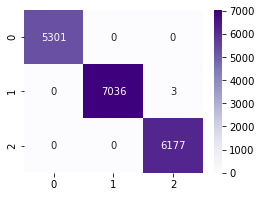

In [73]:
mat_knn1=confusion_matrix(test_set_y, y_pred_knn1)
confussion_matrix(mat_knn1)

In [74]:
print("precision_score_knn:",precision_score(test_set_y, y_pred_knn1,average='weighted')) 
print("recall_score_knn:",recall_score(test_set_y, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(test_set_y, y_pred_knn1,average='weighted'))

precision_score_knn: 0.9998380653621365
recall_score_knn: 0.9998379867149106
f1_score_knn: 0.999837989115421


In [75]:
cv_scores_knn1=cross_val_score(knn1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.99932496 0.99979748 0.99972997 0.99966246 0.99945993] mean: 0.9995949594955394


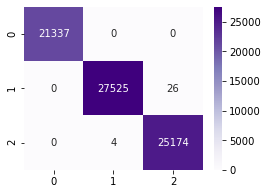

In [76]:
y_pred_knn1_c = cross_val_predict(knn1,  train_set_x, train_set_y, cv=5)
cofussion_knn1=confusion_matrix(train_set_y, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [79]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_knn1_c,average='weighted'))

precision_score: 0.9995952191529673
recall_score: 0.9995949558501876
f1_score: 0.9995949634001159


In [46]:
arr=np.arange(450,500,5)
arr

array([450, 455, 460, 465, 470, 475, 480, 485, 490, 495])

In [47]:
a=0
for x in arr:
    XG1=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(train_set_x, train_set_y)
    y_pred_XG1=XG1.predict(test_set_x)
    accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
    if (accuracy_XG1>a):
        a=accuracy_XG1
        print( x, a)
    else:
        print(x)

450 0.9997839822865475
455
460
465 0.9998919911432738
470
475
480
485
490
495


In [48]:
XG1=XGBClassifier(n_estimators=465, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss") 
XG1.fit(train_set_x, train_set_y)
y_pred_XG1=XG1.predict(test_set_x)
accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
accuracy_XG1

0.9998919911432738

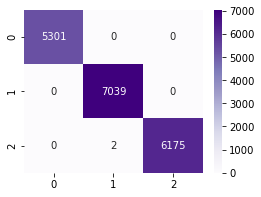

In [49]:
mat_XG1=confusion_matrix(test_set_y, y_pred_XG1)
confussion_matrix(mat_XG1)

In [50]:
print("precision_score_XG:",precision_score(test_set_y, y_pred_XG1,average='weighted')) 
print("recall_score_XG:",recall_score(test_set_y, y_pred_XG1,average='weighted'))
print("f1_score_XG:",f1_score(test_set_y, y_pred_XG1,average='weighted'))

precision_score_XG: 0.99989202182325
recall_score_XG: 0.9998919911432738
f1_score_XG: 0.999891990070117


In [51]:
cv_scores_XG1=cross_val_score(XG1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.99986499 0.99993249 1.         1.         0.99986498] mean: 0.9999324935530604


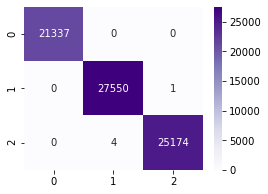

In [52]:
y_pred_XG1_c = cross_val_predict(XG1,  train_set_x, train_set_y, cv=5)
cofussion_XG1=confusion_matrix(train_set_y, y_pred_XG1_c)
confussion_matrix(cofussion_XG1)

In [80]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_XG1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_XG1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_XG1_c,average='weighted'))

precision_score: 0.9999324969127888
recall_score: 0.9999324926416979
f1_score: 0.9999324924682765


In [57]:
# adaboost does not do well ~ 68%

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forest1= RandomForestClassifier(random_state=42)
forest1.fit(train_set_x, train_set_y)
y_pred_forest1=forest1.predict(test_set_x)
accuracy_forest1=metrics.accuracy_score(test_set_y, y_pred_forest1)
accuracy_forest1

1.0

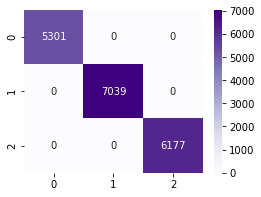

In [57]:
mat_forest1=confusion_matrix(test_set_y, y_pred_forest1)
confussion_matrix(mat_forest1)

In [56]:
print("precision_score_forest:",precision_score(test_set_y, y_pred_forest1,average='weighted')) 
print("recall_score_forset:",recall_score(test_set_y, y_pred_forest1,average='weighted'))
print("f1_score_forest:",f1_score(test_set_y, y_pred_forest1,average='weighted'))

precision_score_forest: 1.0
recall_score_forset: 1.0
f1_score_forest: 1.0


In [58]:
cv_scores_forest1=cross_val_score(forest1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[1.         1.         0.99993249 0.99993249 1.        ] mean: 0.9999729966920947


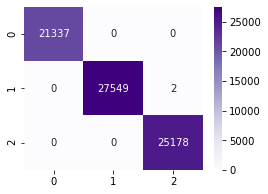

In [59]:
y_pred_forest1_c = cross_val_predict(forest1,  train_set_x, train_set_y, cv=5)
cofussion_forest1=confusion_matrix(train_set_y, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [81]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_forest1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_forest1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_forest1_c,average='weighted'))

precision_score: 0.9999729992014723
recall_score: 0.9999729970566792
f1_score: 0.9999729971028272


In [373]:
# importing the test data
df_test_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv')
df_test_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv')
df_test_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv')
      
df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [374]:
df_test_alone_person1

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,955.0626,111367,left,1,-103.18630,202.8448,69.55882,33.932390,-21.290810,-29.80458,...,1.325872,-152.2580,157.3769,76.07510,-354.5008,33.95922,105.8119,0.000000,0.691257,0.169335
1,955.0790,111369,left,1,-102.32960,202.9333,69.08538,57.518310,8.059143,-26.26248,...,1.315364,-151.0200,157.0506,75.89672,-350.3571,28.37328,102.8271,0.000000,0.942137,0.029751
2,955.0956,111370,left,1,-101.89290,203.3188,68.85271,51.158620,45.151250,-27.25482,...,1.308074,-150.0901,156.9368,75.83788,-348.1030,26.00696,101.6572,0.072042,1.107757,0.000000
3,955.1122,111372,left,1,-101.29390,204.3285,68.23683,14.659080,46.431220,-31.43122,...,1.289553,-148.4725,156.9996,75.79698,-344.0828,22.67866,102.4965,0.196061,1.322298,0.000000
4,955.1291,111374,left,1,-101.26050,204.2364,67.71336,2.770436,-32.604220,-28.28294,...,1.276453,-149.0222,157.6454,76.03125,-347.5767,28.41657,105.9374,0.159523,1.533984,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,1029.9730,119997,left,1,-65.36779,268.4203,92.92239,19.209090,1.148932,51.12441,...,1.237740,-120.4651,229.0899,104.25300,-315.7600,97.43476,165.2269,0.000000,0.002778,0.000000
4696,1029.9890,119999,left,1,-65.02090,268.2647,93.54203,19.509810,-24.841160,29.01798,...,1.261871,-120.5365,229.2687,103.88200,-312.8147,91.42298,160.6147,0.000000,0.000000,0.000000
4697,1030.0050,120000,left,1,-64.90279,268.1617,93.81852,13.696810,-11.943860,32.06398,...,1.271696,-120.5471,229.2187,103.65860,-312.7227,90.16704,157.7339,0.000000,0.000000,0.000000
4698,1030.0210,120002,left,1,-64.88969,268.1849,94.51307,-2.698094,18.951250,43.07390,...,1.289698,-120.7389,229.3267,103.47890,-313.8234,90.55078,154.9628,0.000000,0.000000,0.000000


In [375]:
# changing the nmes for the columns in the right hand data frame
df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 
df_hand_right

,Time_r,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,128.2883,15478,right,1,15.671670,226.2064,20.264700,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.117810,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.949720,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.676790,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.131280,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.86240,510.085200,-105.529500,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.00970,562.359400,-20.707010,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.42160,591.901900,28.880570,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.45930,604.734400,80.566980,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [376]:
# deleting rows with null values
df_test_alone_person1=df_test_alone_person1.dropna('index','any')
df_test_alone_person2=df_test_alone_person2.dropna('index','any')
df_test_alone_person3=df_test_alone_person3.dropna('index','any')

In [377]:
df_test_alone_person1

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,955.0626,111367,left,1,-103.18630,202.8448,69.55882,33.932390,-21.290810,-29.80458,...,1.325872,-152.2580,157.3769,76.07510,-354.5008,33.95922,105.8119,0.000000,0.691257,0.169335
1,955.0790,111369,left,1,-102.32960,202.9333,69.08538,57.518310,8.059143,-26.26248,...,1.315364,-151.0200,157.0506,75.89672,-350.3571,28.37328,102.8271,0.000000,0.942137,0.029751
2,955.0956,111370,left,1,-101.89290,203.3188,68.85271,51.158620,45.151250,-27.25482,...,1.308074,-150.0901,156.9368,75.83788,-348.1030,26.00696,101.6572,0.072042,1.107757,0.000000
3,955.1122,111372,left,1,-101.29390,204.3285,68.23683,14.659080,46.431220,-31.43122,...,1.289553,-148.4725,156.9996,75.79698,-344.0828,22.67866,102.4965,0.196061,1.322298,0.000000
4,955.1291,111374,left,1,-101.26050,204.2364,67.71336,2.770436,-32.604220,-28.28294,...,1.276453,-149.0222,157.6454,76.03125,-347.5767,28.41657,105.9374,0.159523,1.533984,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,1029.9730,119997,left,1,-65.36779,268.4203,92.92239,19.209090,1.148932,51.12441,...,1.237740,-120.4651,229.0899,104.25300,-315.7600,97.43476,165.2269,0.000000,0.002778,0.000000
4696,1029.9890,119999,left,1,-65.02090,268.2647,93.54203,19.509810,-24.841160,29.01798,...,1.261871,-120.5365,229.2687,103.88200,-312.8147,91.42298,160.6147,0.000000,0.000000,0.000000
4697,1030.0050,120000,left,1,-64.90279,268.1617,93.81852,13.696810,-11.943860,32.06398,...,1.271696,-120.5471,229.2187,103.65860,-312.7227,90.16704,157.7339,0.000000,0.000000,0.000000
4698,1030.0210,120002,left,1,-64.88969,268.1849,94.51307,-2.698094,18.951250,43.07390,...,1.289698,-120.7389,229.3267,103.47890,-313.8234,90.55078,154.9628,0.000000,0.000000,0.000000


In [378]:
# adding the right hand to the left
df_test_alone_person1_combo=pd.concat([df_test_alone_person1,df_hand_right],axis=1,)
df_test_alone_person2_combo=pd.concat([df_test_alone_person2,df_hand_right],axis=1,)
df_test_alone_person3_combo=pd.concat([df_test_alone_person3,df_hand_right],axis=1,)

In [379]:
df_test_alone_person1_combo

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,955.0626,111367.0,left,1.0,-103.1863,202.8448,69.55882,33.932390,-21.290810,-29.80458,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,955.0790,111369.0,left,1.0,-102.3296,202.9333,69.08538,57.518310,8.059143,-26.26248,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,955.0956,111370.0,left,1.0,-101.8929,203.3188,68.85271,51.158620,45.151250,-27.25482,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,955.1122,111372.0,left,1.0,-101.2939,204.3285,68.23683,14.659080,46.431220,-31.43122,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,955.1291,111374.0,left,1.0,-101.2605,204.2364,67.71336,2.770436,-32.604220,-28.28294,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [380]:
df_test_alone_person1_combo

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,955.0626,111367.0,left,1.0,-103.1863,202.8448,69.55882,33.932390,-21.290810,-29.80458,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,955.0790,111369.0,left,1.0,-102.3296,202.9333,69.08538,57.518310,8.059143,-26.26248,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,955.0956,111370.0,left,1.0,-101.8929,203.3188,68.85271,51.158620,45.151250,-27.25482,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,955.1122,111372.0,left,1.0,-101.2939,204.3285,68.23683,14.659080,46.431220,-31.43122,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,955.1291,111374.0,left,1.0,-101.2605,204.2364,67.71336,2.770436,-32.604220,-28.28294,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


df_test_alone_person1_combo=df_test_alone_person1_combo.loc[df_test_alone_person1_combo[' # hands']==1]
df_test_alone_person2_combo=df_test_alone_person2_combo.loc[df_test_alone_person2_combo[' # hands']==1]
df_test_alone_person3_combo=df_test_alone_person3_combo.loc[df_test_alone_person3_combo[' # hands']==1]


In [381]:
df_test_alone_person1_combo

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,955.0626,111367.0,left,1.0,-103.1863,202.8448,69.55882,33.932390,-21.290810,-29.80458,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,955.0790,111369.0,left,1.0,-102.3296,202.9333,69.08538,57.518310,8.059143,-26.26248,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,955.0956,111370.0,left,1.0,-101.8929,203.3188,68.85271,51.158620,45.151250,-27.25482,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,955.1122,111372.0,left,1.0,-101.2939,204.3285,68.23683,14.659080,46.431220,-31.43122,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,955.1291,111374.0,left,1.0,-101.2605,204.2364,67.71336,2.770436,-32.604220,-28.28294,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [382]:
df_test_alone_person1_combo["type"]=0
df_test_alone_person2_combo["type"]=0
df_test_alone_person3_combo["type"]=0

In [383]:
df_test_alone_person1_combo

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
0,955.0626,111367.0,left,1.0,-103.1863,202.8448,69.55882,33.932390,-21.290810,-29.80458,...,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0,0
1,955.0790,111369.0,left,1.0,-102.3296,202.9333,69.08538,57.518310,8.059143,-26.26248,...,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0,0
2,955.0956,111370.0,left,1.0,-101.8929,203.3188,68.85271,51.158620,45.151250,-27.25482,...,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0,0
3,955.1122,111372.0,left,1.0,-101.2939,204.3285,68.23683,14.659080,46.431220,-31.43122,...,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0,0
4,955.1291,111374.0,left,1.0,-101.2605,204.2364,67.71336,2.770436,-32.604220,-28.28294,...,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0,0
4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0,0
4809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0,0
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0,0


In [384]:
df_test_alone_person1_combo=df_test_alone_person1_combo.set_index('Time')
df_test_alone_person2_combo=df_test_alone_person2_combo.set_index('Time')
df_test_alone_person3_combo=df_test_alone_person3_combo.set_index('Time')


In [385]:
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')


In [386]:
df_test_alone_person1_combo

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
Time,,,,,,,,,,,,,,,,,,,,,
955.0626,111367.0,left,1.0,-103.18630,202.8448,69.55882,33.932390,-21.290810,-29.804580,1.275502,...,46.888310,207.35480,86.23589,203.83370,49.33507,237.4553,0.0,0.206389,0.0,0
955.0790,111369.0,left,1.0,-102.32960,202.9333,69.08538,57.518310,8.059143,-26.262480,1.266561,...,47.548610,205.65680,86.42250,203.95530,47.88272,238.4482,0.0,0.243050,0.0,0
955.0956,111370.0,left,1.0,-101.89290,203.3188,68.85271,51.158620,45.151250,-27.254820,1.264301,...,48.150300,204.51820,86.35149,204.62310,45.35921,236.8544,0.0,0.281134,0.0,0
955.1122,111372.0,left,1.0,-101.29390,204.3285,68.23683,14.659080,46.431220,-31.431220,1.256673,...,48.641750,203.99890,86.16056,204.99390,44.18692,236.0927,0.0,0.277691,0.0,0
955.1291,111374.0,left,1.0,-101.26050,204.2364,67.71336,2.770436,-32.604220,-28.282940,1.235468,...,48.931350,203.37770,85.59017,204.59520,42.68003,235.2896,0.0,0.283008,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025.4620,119477.0,left,1.0,-62.92888,266.9514,92.64664,17.963030,-4.719894,-23.632570,1.256211,...,1.693034,105.98620,171.82360,-108.34840,-93.43824,319.8367,0.0,0.133462,0.0,0
1025.4790,119479.0,left,1.0,-62.67447,267.0143,92.47951,16.788550,11.080850,-2.067491,1.300116,...,0.450534,104.88660,177.28050,-104.47600,-95.64841,327.4911,0.0,0.100465,0.0,0
1025.4950,119481.0,left,1.0,-62.16501,267.2610,92.39859,30.976320,29.271230,-1.964893,1.323621,...,0.317466,103.76150,179.51640,-98.71099,-100.80110,328.2934,0.0,0.202968,0.0,0


In [387]:
df_test_alone_person1_combo=df_test_alone_person1_combo.iloc[700:]
df_test_alone_person2_combo=df_test_alone_person2_combo.iloc[700:]
df_test_alone_person3_combo=df_test_alone_person3_combo.iloc[700:]

In [388]:
df_test_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv')
df_test_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv')
df_test_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv')

In [389]:
df_test_sync_person1

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,865.9976,101109,right,2,92.28929,229.8149,111.47030,-145.099200,42.863380,-155.18560,...,-1.855098,122.0846,170.6122,100.16960,276.2068,-9.721443,135.5313,0.0,0.000000,0.000000
1,865.9976,101109,left,2,-169.46250,228.3028,107.17290,9.920160,1.107885,140.91000,...,2.369029,-187.9881,166.2407,89.60328,-312.0246,-37.920480,110.9919,0.0,0.000000,0.000000
2,866.0141,101111,right,2,90.14411,232.3153,109.17400,-107.170500,188.920400,-111.71460,...,-1.742294,120.4262,172.9143,100.24080,280.8544,-1.658156,136.4561,0.0,0.000000,0.000000
3,866.0141,101111,left,2,-169.33500,228.0368,109.20630,4.446306,-32.682920,114.00140,...,2.472648,-186.6441,166.0367,90.36256,-310.6212,-38.430010,109.0002,0.0,0.000000,0.000000
4,866.0306,101112,right,2,88.93578,233.5297,107.83430,-139.224900,139.924600,-154.36050,...,-1.695856,119.1007,173.9150,99.89700,281.7841,1.465358,136.2225,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8841,940.9453,109740,left,2,-156.92610,190.6033,24.13203,44.096040,-11.584630,77.23640,...,0.700521,-195.2724,152.9445,64.16640,-388.4472,66.760110,174.9549,0.0,0.000000,0.000000
8842,940.9620,109742,right,2,92.61110,246.6407,30.15626,-132.738000,-215.344800,83.76984,...,-0.897452,124.9882,189.0923,43.42738,287.0567,24.771870,104.6724,1.0,3.141593,0.323021
8843,940.9620,109742,left,2,-156.55790,190.6120,25.40769,16.115320,-5.760142,77.64056,...,0.708944,-195.2395,152.9626,65.15083,-387.8782,66.759150,176.8542,0.0,0.000000,0.000000
8844,940.9783,109744,right,2,91.22672,243.6101,31.76584,-63.206630,-172.430800,90.71486,...,-0.943280,124.2058,186.1504,43.92022,286.1271,20.669030,102.3647,1.0,3.141593,0.325607


In [390]:
#seperating the left hand from the right hand
df_test_sync_person1_r=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="right"]
df_test_sync_person2_r=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="right"]
df_test_sync_person3_r=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="right"]
df_test_sync_person1_l=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="left"]
df_test_sync_person2_l=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="left"]
df_test_sync_person3_l=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="left"]


In [391]:
df_test_sync_person1_l

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
1,865.9976,101109,left,2,-169.4625,228.3028,107.17290,9.920160,1.107885,140.91000,...,2.369029,-187.9881,166.2407,89.60328,-312.0246,-37.92048,110.9919,0.0,0.0,0.0
3,866.0141,101111,left,2,-169.3350,228.0368,109.20630,4.446306,-32.682920,114.00140,...,2.472648,-186.6441,166.0367,90.36256,-310.6212,-38.43001,109.0002,0.0,0.0,0.0
5,866.0306,101112,left,2,-169.0551,227.6669,109.89220,32.247900,-42.621700,79.02841,...,2.511006,-185.9059,165.7069,90.57555,-310.1883,-38.64052,108.4739,0.0,0.0,0.0
7,866.0480,101114,left,2,-167.9179,226.6983,110.49990,63.069720,-46.391580,23.85685,...,2.532100,-184.7281,164.9232,90.65044,-310.6453,-38.45655,108.1393,0.0,0.0,0.0
9,866.0641,101116,left,2,-166.9572,225.7605,110.46400,55.636890,-61.350080,-13.61763,...,2.558118,-183.4656,164.0374,90.33614,-311.3591,-38.01362,108.8549,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,940.9120,109736,left,2,-158.4120,191.1754,21.53754,24.436260,-18.527140,70.89678,...,0.681851,-195.9295,153.4765,62.26719,-389.3468,67.16129,172.5296,0.0,0.0,0.0
8839,940.9286,109738,left,2,-157.6899,190.8683,22.82245,39.235280,-14.722660,77.88538,...,0.688953,-195.5255,153.0945,63.19428,-389.3571,67.03780,172.9297,0.0,0.0,0.0
8841,940.9453,109740,left,2,-156.9261,190.6033,24.13203,44.096040,-11.584630,77.23640,...,0.700521,-195.2724,152.9445,64.16640,-388.4472,66.76011,174.9549,0.0,0.0,0.0
8843,940.9620,109742,left,2,-156.5579,190.6120,25.40769,16.115320,-5.760142,77.64056,...,0.708944,-195.2395,152.9626,65.15083,-387.8782,66.75915,176.8542,0.0,0.0,0.0


In [392]:
df_test_sync_person1_r=df_test_sync_person1_r.set_axis(columns_right, axis='columns')
df_test_sync_person2_r=df_test_sync_person2_r.set_axis(columns_right, axis='columns')
df_test_sync_person3_r=df_test_sync_person3_r.set_axis(columns_right, axis='columns')

In [393]:
df_test_sync_person1_l

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
1,865.9976,101109,left,2,-169.4625,228.3028,107.17290,9.920160,1.107885,140.91000,...,2.369029,-187.9881,166.2407,89.60328,-312.0246,-37.92048,110.9919,0.0,0.0,0.0
3,866.0141,101111,left,2,-169.3350,228.0368,109.20630,4.446306,-32.682920,114.00140,...,2.472648,-186.6441,166.0367,90.36256,-310.6212,-38.43001,109.0002,0.0,0.0,0.0
5,866.0306,101112,left,2,-169.0551,227.6669,109.89220,32.247900,-42.621700,79.02841,...,2.511006,-185.9059,165.7069,90.57555,-310.1883,-38.64052,108.4739,0.0,0.0,0.0
7,866.0480,101114,left,2,-167.9179,226.6983,110.49990,63.069720,-46.391580,23.85685,...,2.532100,-184.7281,164.9232,90.65044,-310.6453,-38.45655,108.1393,0.0,0.0,0.0
9,866.0641,101116,left,2,-166.9572,225.7605,110.46400,55.636890,-61.350080,-13.61763,...,2.558118,-183.4656,164.0374,90.33614,-311.3591,-38.01362,108.8549,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,940.9120,109736,left,2,-158.4120,191.1754,21.53754,24.436260,-18.527140,70.89678,...,0.681851,-195.9295,153.4765,62.26719,-389.3468,67.16129,172.5296,0.0,0.0,0.0
8839,940.9286,109738,left,2,-157.6899,190.8683,22.82245,39.235280,-14.722660,77.88538,...,0.688953,-195.5255,153.0945,63.19428,-389.3571,67.03780,172.9297,0.0,0.0,0.0
8841,940.9453,109740,left,2,-156.9261,190.6033,24.13203,44.096040,-11.584630,77.23640,...,0.700521,-195.2724,152.9445,64.16640,-388.4472,66.76011,174.9549,0.0,0.0,0.0
8843,940.9620,109742,left,2,-156.5579,190.6120,25.40769,16.115320,-5.760142,77.64056,...,0.708944,-195.2395,152.9626,65.15083,-387.8782,66.75915,176.8542,0.0,0.0,0.0


In [394]:
df_test_sync_person1_r=df_test_sync_person1_r.set_index('Time_r')
df_test_sync_person2_r=df_test_sync_person2_r.set_index('Time_r')
df_test_sync_person3_r=df_test_sync_person3_r.set_index('Time_r')
df_test_sync_person1_l=df_test_sync_person1_l.set_index('Time')
df_test_sync_person2_l=df_test_sync_person2_l.set_index('Time')
df_test_sync_person3_l=df_test_sync_person3_l.set_index('Time')

In [395]:
df_test_sync_person1_r

,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,Roll_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
Time_r,,,,,,,,,,,,,,,,,,,,,
865.9976,101109,right,2,92.28929,229.8149,111.47030,-145.09920,42.86338,-155.18560,1.680588,...,-1.855098,122.0846,170.6122,100.16960,276.2068,-9.721443,135.5313,0.0,0.000000,0.000000
866.0141,101111,right,2,90.14411,232.3153,109.17400,-107.17050,188.92040,-111.71460,1.636428,...,-1.742294,120.4262,172.9143,100.24080,280.8544,-1.658156,136.4561,0.0,0.000000,0.000000
866.0306,101112,right,2,88.93578,233.5297,107.83430,-139.22490,139.92460,-154.36050,1.617739,...,-1.695856,119.1007,173.9150,99.89700,281.7841,1.465358,136.2225,0.0,0.000000,0.000000
866.0480,101114,right,2,86.34717,236.1330,105.03240,-138.72800,193.90990,-140.63640,1.586208,...,-1.612333,116.5025,176.2925,98.74449,282.0415,6.572340,135.0247,0.0,0.000000,0.000000
866.0641,101116,right,2,84.63277,239.8735,103.14620,-90.58269,194.17770,-110.54490,1.559535,...,-1.540096,114.4836,179.7164,98.17319,279.3752,9.066888,133.0133,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940.9120,109736,right,2,96.33887,253.2713,25.31651,-31.56062,-19.37572,99.91273,1.232780,...,-0.802106,127.3263,195.4541,40.65041,288.5701,30.179510,101.5037,1.0,2.681496,0.021337
940.9286,109738,right,2,95.48153,251.9182,27.00833,-46.33922,-77.69422,103.26620,1.241029,...,-0.813845,126.5624,194.0546,41.93171,289.5139,30.321430,102.4015,1.0,2.833228,0.144013
940.9453,109740,right,2,94.69070,250.3047,28.66101,-37.48019,-119.25830,105.07570,1.251406,...,-0.833175,125.8509,192.3500,43.03086,288.2248,28.247920,104.0520,1.0,2.980195,0.268354


In [396]:
df_test_sync_person1_l

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Time,,,,,,,,,,,,,,,,,,,,,
865.9976,101109,left,2,-169.4625,228.3028,107.17290,9.920160,1.107885,140.91000,1.771344,...,2.369029,-187.9881,166.2407,89.60328,-312.0246,-37.92048,110.9919,0.0,0.0,0.0
866.0141,101111,left,2,-169.3350,228.0368,109.20630,4.446306,-32.682920,114.00140,1.791407,...,2.472648,-186.6441,166.0367,90.36256,-310.6212,-38.43001,109.0002,0.0,0.0,0.0
866.0306,101112,left,2,-169.0551,227.6669,109.89220,32.247900,-42.621700,79.02841,1.798957,...,2.511006,-185.9059,165.7069,90.57555,-310.1883,-38.64052,108.4739,0.0,0.0,0.0
866.0480,101114,left,2,-167.9179,226.6983,110.49990,63.069720,-46.391580,23.85685,1.808114,...,2.532100,-184.7281,164.9232,90.65044,-310.6453,-38.45655,108.1393,0.0,0.0,0.0
866.0641,101116,left,2,-166.9572,225.7605,110.46400,55.636890,-61.350080,-13.61763,1.813240,...,2.558118,-183.4656,164.0374,90.33614,-311.3591,-38.01362,108.8549,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940.9120,109736,left,2,-158.4120,191.1754,21.53754,24.436260,-18.527140,70.89678,0.609368,...,0.681851,-195.9295,153.4765,62.26719,-389.3468,67.16129,172.5296,0.0,0.0,0.0
940.9286,109738,left,2,-157.6899,190.8683,22.82245,39.235280,-14.722660,77.88538,0.614261,...,0.688953,-195.5255,153.0945,63.19428,-389.3571,67.03780,172.9297,0.0,0.0,0.0
940.9453,109740,left,2,-156.9261,190.6033,24.13203,44.096040,-11.584630,77.23640,0.616294,...,0.700521,-195.2724,152.9445,64.16640,-388.4472,66.76011,174.9549,0.0,0.0,0.0


In [397]:
df_test_sync_person1_combo=pd.concat([df_test_sync_person1_l,df_test_sync_person1_r],axis=1)
df_test_sync_person2_combo=pd.concat([df_test_sync_person2_l,df_test_sync_person2_r],axis=1)
df_test_sync_person3_combo=pd.concat([df_test_sync_person3_l,df_test_sync_person3_r],axis=1)

In [398]:
df_test_sync_person3_combo

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
923.9424,60419.0,left,2.0,-148.32810,230.1470,62.25312,5.876238,-3.954398,-1.790505,1.432667,...,-1.487031,184.8920,179.2940,78.44900,392.0090,22.41978,103.9079,0.0,0.000000,0.0
923.9752,60421.0,left,2.0,-148.22830,230.1436,62.28297,6.407139,-2.264127,1.255484,1.432147,...,-1.497881,183.0541,177.6421,79.65894,390.1131,20.90897,106.4509,0.0,0.000000,0.0
924.0088,60424.0,left,2.0,-147.44060,229.9008,62.65169,18.455020,-4.699109,10.851530,1.436649,...,-1.510192,182.8558,178.5731,82.09712,391.8507,24.57040,109.7152,0.0,0.000000,0.0
924.0444,60426.0,left,2.0,-147.18210,230.3021,63.31649,8.756739,19.044180,25.230250,1.445313,...,-1.515189,182.2007,178.8493,83.88551,392.0986,26.45049,113.5007,0.0,0.000000,0.0
924.0784,60428.0,left,2.0,-146.79020,230.7176,64.05653,9.580503,18.585340,25.825910,1.456568,...,-1.516054,181.7869,179.0804,86.00849,391.7337,28.28187,122.6552,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998.7513,66216.0,left,2.0,-98.32814,314.4973,75.12682,41.168180,115.850700,27.614590,1.611798,...,-1.447439,156.7337,255.0919,101.90250,341.0338,65.01146,125.5006,0.0,0.000000,0.0
998.7836,66219.0,left,2.0,-97.31071,319.5955,76.22157,31.363020,143.961000,30.502050,1.616390,...,-1.447845,157.5847,259.1192,102.11500,336.8353,64.01215,123.4790,0.0,0.000000,0.0
998.8158,66221.0,left,2.0,-96.74767,323.8981,76.98316,27.149880,185.621800,33.741870,1.619489,...,-1.436827,159.1932,263.2726,102.53110,332.9102,62.99343,121.6264,0.0,0.000000,0.0
998.8495,66224.0,left,2.0,-95.67720,329.8123,78.13316,47.376960,118.316700,24.152470,1.618042,...,-1.418975,163.0329,269.7217,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.0


In [399]:
df_test_sync_person1_combo=df_test_sync_person1_combo.loc[df_test_sync_person1_combo[' # hands']==2]
df_test_sync_person2_combo=df_test_sync_person2_combo.loc[df_test_sync_person2_combo[' # hands']==2]
df_test_sync_person3_combo=df_test_sync_person3_combo.loc[df_test_sync_person3_combo[' # hands']==2]

In [400]:
df_test_sync_person1_combo["type"]=1
df_test_sync_person2_combo["type"]=1
df_test_sync_person3_combo["type"]=1

<ipython-input-400-5c3ea82e2d35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_sync_person3_combo["type"]=1


In [401]:
df_test_sync_person1_combo=df_test_sync_person1_combo.iloc[700:]
df_test_sync_person2_combo=df_test_sync_person2_combo.iloc[700:]
df_test_sync_person3_combo=df_test_sync_person3_combo.iloc[700:]

In [402]:
df_test_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv')
df_test_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv')
df_test_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv')


In [403]:
df_test_spontan_person1

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,772.2799,90321,right,2,65.37845,224.3082,112.75900,-112.50850,-293.12840,318.10640,...,-1.555058,129.0877,196.6624,107.62950,351.3936,90.84698,131.1359,0.0,0.453898,0.000000
1,772.2799,90321,left,2,-218.35700,305.6544,63.57877,193.24920,313.48280,-16.51894,...,1.061162,-276.7855,279.1037,91.25497,-481.7012,163.33340,167.2560,0.0,0.550612,0.460952
2,772.2964,90323,right,2,63.55072,220.1848,117.93530,-57.90208,-37.84834,377.73690,...,-1.579605,127.3381,193.0091,111.56650,354.6543,98.62046,135.8045,0.0,0.495044,0.000000
3,772.2964,90323,left,2,-213.44920,312.6948,62.97603,378.39140,334.78480,-62.01735,...,1.071478,-273.1128,287.6982,89.44084,-475.7014,169.70460,168.2110,0.0,0.540570,0.128885
4,772.3131,90325,right,2,61.66813,217.5243,122.59860,-90.69568,-84.79558,298.46620,...,-1.597150,125.6021,190.9333,115.36450,356.3591,105.17530,139.1584,0.0,0.518979,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,847.2275,98950,left,2,-150.72760,259.0209,117.06250,-236.53080,214.32920,-32.25535,...,1.114758,-187.4687,202.7370,125.11110,-362.7885,45.95663,175.3442,0.0,0.365406,0.000000
8965,847.2441,98952,right,2,107.13800,245.0327,70.16479,-74.29438,-98.46943,226.40060,...,-0.998020,152.1299,197.4895,88.37344,319.5492,34.00341,143.9031,0.0,0.000000,0.000000
8966,847.2441,98952,left,2,-153.69770,261.4125,115.67830,-163.00240,134.59880,-81.09931,...,1.081933,-189.1801,204.3893,124.29880,-360.3357,42.51260,172.6946,0.0,0.361012,0.000000
8967,847.2610,98954,right,2,106.04170,244.7176,74.23104,-55.24607,10.58982,245.27240,...,-1.050774,152.3689,197.9884,91.06026,318.1998,33.10643,147.2253,0.0,0.000000,0.000000


In [404]:
df_test_spontan_person1_r=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="right"]
df_test_spontan_person2_r=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="right"]
df_test_spontan_person3_r=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="right"]
df_test_spontan_person1_l=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="left"]
df_test_spontan_person2_l=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="left"]
df_test_spontan_person3_l=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="left"]

In [405]:
df_test_spontan_person1_r

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,772.2799,90321,right,2,65.37845,224.3082,112.75900,-112.50850,-293.12840,318.1064,...,-1.555058,129.0877,196.6624,107.62950,351.3936,90.84698,131.1359,0.0,0.453898,0.0
2,772.2964,90323,right,2,63.55072,220.1848,117.93530,-57.90208,-37.84834,377.7369,...,-1.579605,127.3381,193.0091,111.56650,354.6543,98.62046,135.8045,0.0,0.495044,0.0
4,772.3131,90325,right,2,61.66813,217.5243,122.59860,-90.69568,-84.79558,298.4662,...,-1.597150,125.6021,190.9333,115.36450,356.3591,105.17530,139.1584,0.0,0.518979,0.0
6,772.3296,90327,right,2,60.27318,215.3182,126.58120,-66.44232,-100.88130,269.1542,...,-1.609908,124.1724,188.8540,118.54230,355.9033,104.77030,138.5432,0.0,0.533946,0.0
8,772.3464,90328,right,2,59.31719,213.2799,127.72340,-110.60830,-235.83750,132.1554,...,-1.612697,123.4233,187.3725,119.44890,355.2591,103.04280,137.0559,0.0,0.575149,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8959,847.1946,98946,right,2,109.68560,241.2414,57.40737,-68.26772,113.59740,248.2158,...,-0.872291,154.4888,196.2750,81.67034,339.3470,59.88214,152.8385,0.0,0.187416,0.0
8961,847.2109,98948,right,2,108.67030,243.8204,61.77488,-25.79234,202.41910,263.4047,...,-0.916421,153.5085,197.6717,83.63566,334.6054,53.39169,148.6560,0.0,0.067313,0.0
8963,847.2275,98950,right,2,107.95610,245.2181,65.94923,-71.14731,43.33821,223.8707,...,-0.955578,152.6360,198.0247,85.80412,327.9107,44.87714,146.3439,0.0,0.004035,0.0
8965,847.2441,98952,right,2,107.13800,245.0327,70.16479,-74.29438,-98.46943,226.4006,...,-0.998020,152.1299,197.4895,88.37344,319.5492,34.00341,143.9031,0.0,0.000000,0.0


In [406]:
df_test_spontan_person1_r=df_test_spontan_person1_r.set_axis(columns_right,axis='columns')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_axis(columns_right,axis='columns')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_axis(columns_right,axis='columns')

In [407]:
df_test_spontan_person3_r

,Time_r,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,816.9093,51596,right,2,155.7260,201.7098,60.68230,114.60060,169.523700,20.31916,...,-1.330040,222.7483,173.1680,69.78082,428.9640,22.768140,124.83950,0.0,0.733249,0.0
2,816.9432,51598,right,2,158.6075,205.9025,61.30880,106.41630,154.329100,26.58099,...,-1.326279,223.7397,173.1158,69.78682,418.2223,4.817778,114.81930,0.0,0.651293,0.0
4,816.9761,51600,right,2,161.3685,209.6110,61.95419,100.13320,133.623500,22.13141,...,-1.326218,225.0049,174.0424,69.87800,403.3784,-13.057590,106.63620,0.0,0.571400,0.0
6,817.0090,51603,right,2,164.4216,213.7035,63.59406,89.31621,123.932900,54.35199,...,-1.334961,225.9473,174.4212,70.29465,390.1909,-26.629690,98.12305,0.0,0.543876,0.0
8,817.0451,51606,right,2,167.2481,218.3862,65.42891,66.98019,109.138300,54.45299,...,-1.340683,225.6914,174.3247,70.94621,384.5780,-31.735170,92.42010,0.0,0.549094,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,891.7161,58577,right,2,261.2222,286.7403,88.62954,128.37570,183.356000,245.04080,...,1.829542,259.1438,214.1489,81.66591,357.1292,-23.849340,117.52430,0.0,0.000000,0.0
4492,891.7498,58580,right,2,264.4856,291.5291,99.44252,73.23366,128.541800,311.61050,...,1.967254,263.3937,219.1755,90.31033,364.5702,-18.458120,118.94760,0.0,0.039183,0.0
4494,891.7819,58583,right,2,267.3354,297.5400,111.39490,83.02208,176.620500,363.52080,...,2.183346,270.1656,225.3236,100.75550,377.3418,-11.117420,112.19170,0.0,0.070024,0.0
4496,891.8161,58585,right,2,267.8961,299.6111,119.21900,15.68196,76.817810,356.73430,...,2.434011,272.7868,227.7773,106.85620,384.1153,-6.891727,114.28390,0.0,0.104950,0.0


In [408]:
df_test_spontan_person1_r=df_test_spontan_person1_r.set_index('Time_r')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_index('Time_r')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_index('Time_r')
df_test_spontan_person1_l=df_test_spontan_person1_l.set_index('Time')
df_test_spontan_person2_l=df_test_spontan_person2_l.set_index('Time')
df_test_spontan_person3_l=df_test_spontan_person3_l.set_index('Time')


In [409]:
df_test_spontan_person1_combo=pd.concat([df_test_spontan_person1_l,df_test_spontan_person1_r],axis=1)
df_test_spontan_person2_combo=pd.concat([df_test_spontan_person2_l,df_test_spontan_person2_r],axis=1)
df_test_spontan_person3_combo=pd.concat([df_test_spontan_person3_l,df_test_spontan_person3_r],axis=1)

In [410]:
df_test_spontan_person1_combo=df_test_spontan_person1_combo.loc[df_test_spontan_person1_combo[" # hands"]==2]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.loc[df_test_spontan_person2_combo[" # hands"]==2]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.loc[df_test_spontan_person3_combo[" # hands"]==2]

In [411]:
df_test_spontan_person1_combo["type"]=2
df_test_spontan_person2_combo["type"]=2
df_test_spontan_person3_combo["type"]=2

In [412]:
df_test_spontan_person1_combo=df_test_spontan_person1_combo.iloc[700:]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.iloc[700:]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.iloc[700:]

In [413]:
data_test1=pd.concat([df_test_alone_person1_combo,df_test_alone_person1_combo,df_test_alone_person1_combo],axis=0)
data_test2=pd.concat([df_test_sync_person1_combo,df_test_sync_person2_combo,df_test_sync_person3_combo],axis=0)
data_test3=pd.concat([df_test_spontan_person1_combo,df_test_spontan_person2_combo,df_test_spontan_person3_combo],axis=0)

In [414]:
data_test1=data_test1.drop(['Time_r'],axis=1)
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11184 entries, 966.6613 to 1025.529
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         11184 non-null  float64
 1    Hand Type        11184 non-null  object 
 2    # hands          11184 non-null  float64
 3    Position X       11184 non-null  float64
 4    Position Y       11184 non-null  float64
 5    Position Z       11184 non-null  float64
 6    Velocity X       11184 non-null  float64
 7    Velocity Y       11184 non-null  float64
 8    Velocity Z       11184 non-null  float64
 9    Pitch            11184 non-null  float64
 10   Roll             11184 non-null  float64
 11   Yaw              11184 non-null  float64
 12   Wrist Pos X      11184 non-null  float64
 13   Wrist Pos Y      11184 non-null  float64
 14   Wrist Pos Z      11184 non-null  float64
 15   Elbow pos X      11184 non-null  float64
 16   Elbow Pos Y      11184 non-

In [415]:
data_test=pd.concat([data_test1,data_test2,data_test3],axis=0)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  object 
 2    # hands          29153 non-null  float64
 3    Position X       29153 non-null  float64
 4    Position Y       29153 non-null  float64
 5    Position Z       29153 non-null  float64
 6    Velocity X       29153 non-null  float64
 7    Velocity Y       29153 non-null  float64
 8    Velocity Z       29153 non-null  float64
 9    Pitch            29153 non-null  float64
 10   Roll             29153 non-null  float64
 11   Yaw              29153 non-null  float64
 12   Wrist Pos X      29153 non-null  float64
 13   Wrist Pos Y      29153 non-null  float64
 14   Wrist Pos Z      29153 non-null  float64
 15   Elbow pos X      29153 non-null  float64
 16   Elbow Pos Y      29153 non-

In [416]:
data_test

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,left,1.0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,left,1.0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,left,1.0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,left,1.0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,left,1.0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,left,2.0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,left,2.0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,left,2.0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,left,2.0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [417]:
data_test=data_test.drop([' # hands'],axis=1)
data_test[" Hand Type"]=0
data_test["Hand Type_r"]=1
data_test

<ipython-input-417-a32d2a800cf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[" Hand Type"]=0
<ipython-input-417-a32d2a800cf0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Hand Type_r"]=1


,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,-0.292849,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,-0.231436,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,-0.178354,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,-0.122899,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,-0.102620,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,0.586312,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [418]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  int64  
 2    Position X       29153 non-null  float64
 3    Position Y       29153 non-null  float64
 4    Position Z       29153 non-null  float64
 5    Velocity X       29153 non-null  float64
 6    Velocity Y       29153 non-null  float64
 7    Velocity Z       29153 non-null  float64
 8    Pitch            29153 non-null  float64
 9    Roll             29153 non-null  float64
 10   Yaw              29153 non-null  float64
 11   Wrist Pos X      29153 non-null  float64
 12   Wrist Pos Y      29153 non-null  float64
 13   Wrist Pos Z      29153 non-null  float64
 14   Elbow pos X      29153 non-null  float64
 15   Elbow Pos Y      29153 non-null  float64
 16   Elbow Pos Z      29153 non-

In [421]:
data_test=np.array(data_test,dtype='float32')
data_test_x=data_test[:,0:41]
data_test_y=data_test[:,41]